# EDA Case Study


#### By: Arsh Dinesh Vijayvargiya

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

------

### *Data Inspection*

In [2]:
loan = pd.read_csv("loan.csv")

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


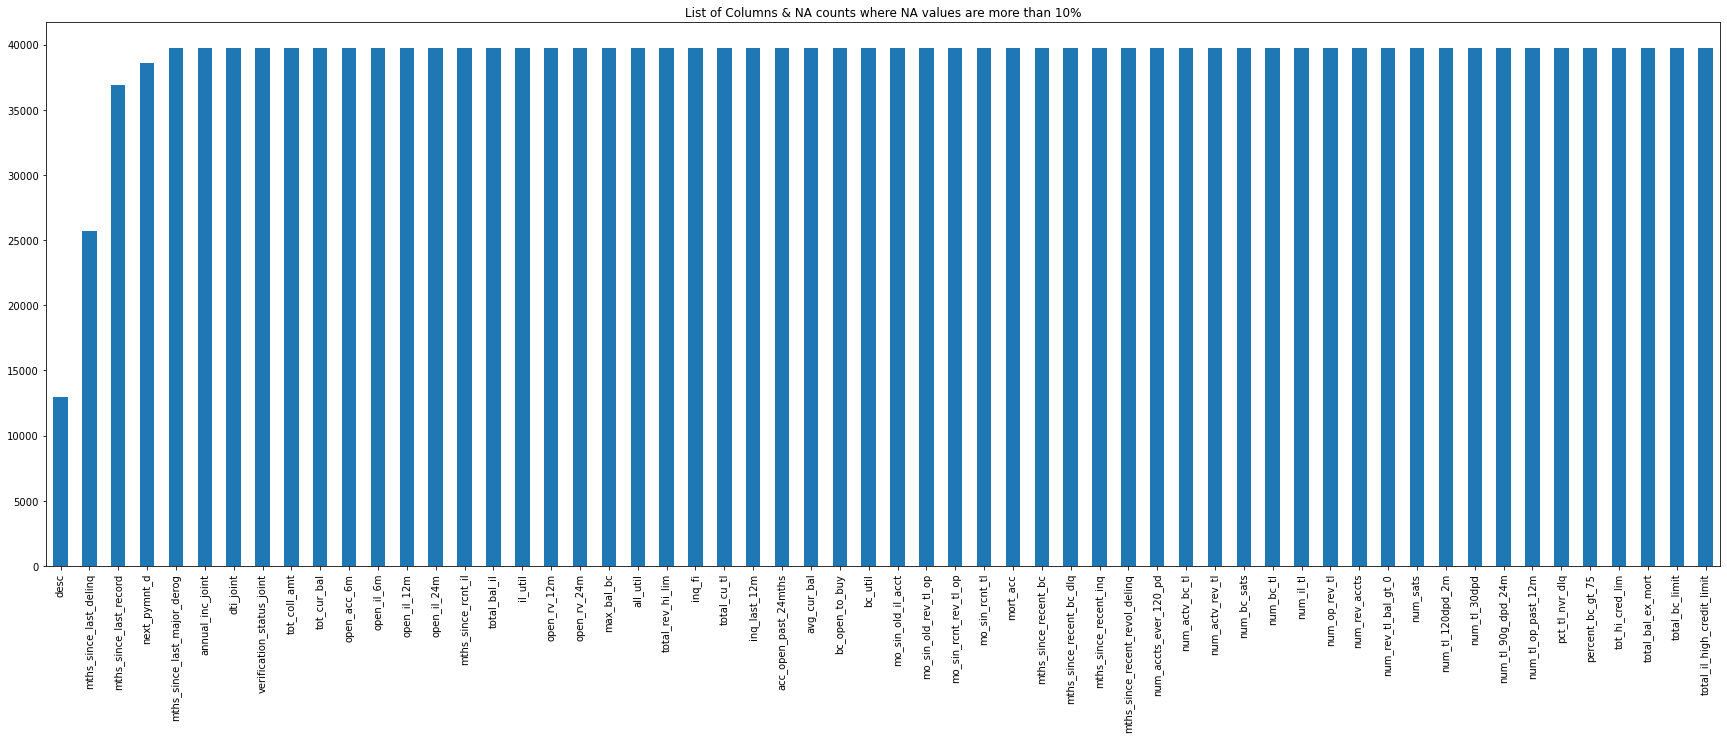

In [6]:
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.1*len(loan))]
plt.figure(figsize=(30,10))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 10%')
plt.show()

##### Insight: We can see from the above plot that there are 30+ columns in the dataset where all the values are NA.

-----------------

###  *Data Cleaning*

In [7]:
loan.shape

(39717, 111)

As we can see there are 39717 rows & 111 columns in the dataset, it will be very difficult to look at each column one by one & find the NA or missing values. So we will remove those columns which has null value percentange more than 10% ,as it is not feasable to impute missing values for those columns.

In [8]:
colnames = (loan.isnull().sum()/len(loan))
colnames = list(colnames[colnames.values>=0.1].index)
loan.drop(labels = colnames,axis =1, inplace = True)        
print("Number of Columns dropped\t: ",len(colnames))

Number of Columns dropped	:  58


Simillarly, we will drop rows whose null value percentage is less than 30%.

In [9]:
rownames = loan.isnull().sum(axis=1)
rownames = list(rownames[rownames.values > 0.3*len(loan)].index)
loan.drop(loan.index[rownames],inplace=True) 
print("\nNumber of Rows dropped\t: ",len(rownames))


Number of Rows dropped	:  0


There are no rows where NA values are more than or equal to 30%.

#### Removing columns where number of unique value is only 1 because that will not be any help in the analysis.

In [10]:
unique = loan.nunique()
unique = unique[unique.values == 1]
loan.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (39717, 44) rows & columns.


-----

### *Data Manipulation*

We will now impute or manipulate columns which are useful for our analysis.

In [11]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

We will fill NA value in emp_length with 0 as for people that are self-employed applicants, emp_length is **NOT APPLICABLE**.

In [12]:
loan.emp_length.fillna('0', inplace = True)

In [13]:
loan.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

We will now see the distribution of values in ***purpose*** and use the significant ones i.e value count percentange is greater than 1 for our analysis also we can drop "other" as it will not give any usefull insight of the data.

In [14]:
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [15]:
del_purpose = (loan.purpose.value_counts()*100)/len(loan)
del_purpose = del_purpose[(del_purpose < 1) | (del_purpose.index == 'other')]
loan.drop(labels = loan[loan.purpose.isin(del_purpose.index)].index, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (34534, 44) rows & columns.


Now we have to remove "%" from int_rate column in order to use it for analysis

In [16]:
loan['int_rate'] = loan.int_rate.apply(lambda x : x.split("%")[0]).astype(float)

In [17]:
loan.int_rate.describe()

count    34534.000000
mean        12.060800
std          3.747302
min          5.420000
25%          9.250000
50%         11.860000
75%         14.650000
max         24.110000
Name: int_rate, dtype: float64

------

### *Derived Metrics* 

Creating new column 'loan_by_income' will help us understand how much an applicant apply for loan with respect to their annual income later we can see what is the safest ratio . 

In [18]:
loan['loan_by_income'] = loan['loan_amnt']/loan['annual_inc']

-----

### *Univatiate Analysis*

1. Continuous -- For continuous variable, we will use box-plots as well as distribution plots.
2. Categorical -- For categorical variables, we will use countplots or bar charts

In order to visualise all variables we will simply create function for our convienence.

In [19]:
def uni_conti(df,col):
    fig , axes = plt.subplots(1,2,figsize =(15,8))
    axes[0].set_title('Distribution Plot')
    sns.distplot(df[col],ax=axes[0])
    axes[1].set_title("Box Plot")
    sns.boxplot(data =df, x=col,ax=axes[1],orient='v')
    plt.show()

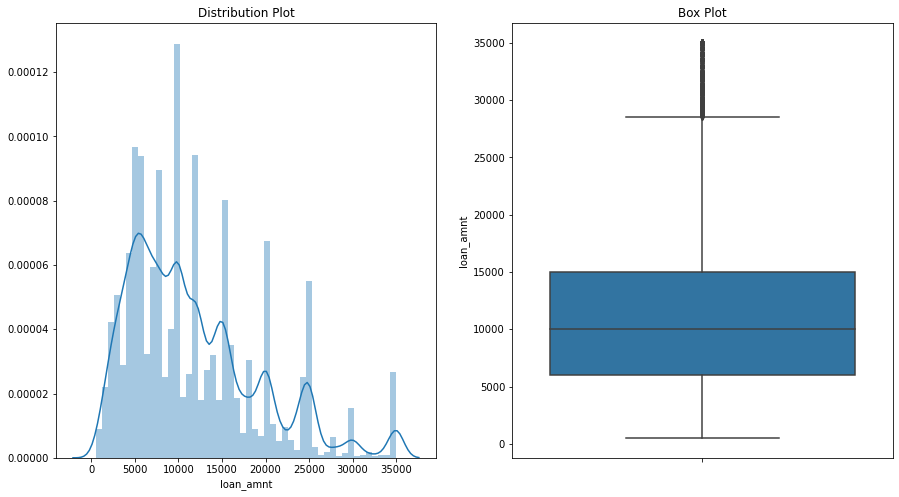

In [20]:
uni_conti(loan,'loan_amnt')

##### Insight: Most of the loan amount is distributed between 6000 - 15000.

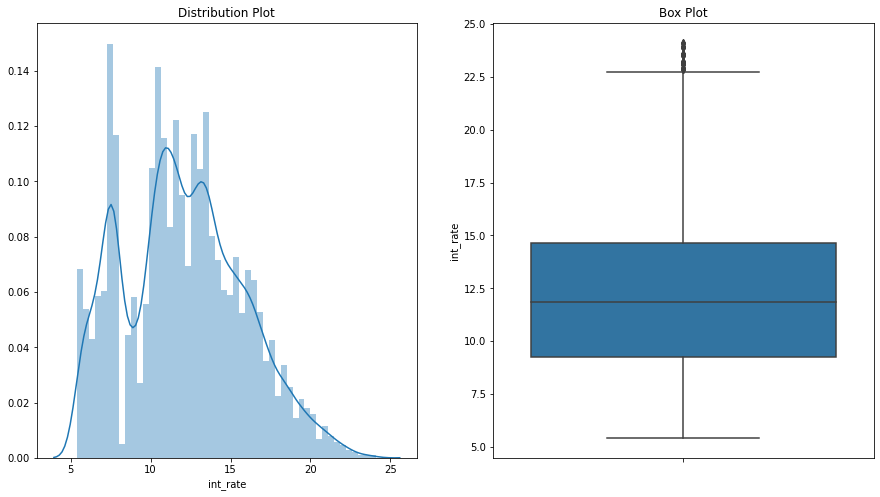

In [21]:
uni_conti(loan,'int_rate')

##### Insight: Most of the loans intrest rate is spreaded between 9 to 15 percent.

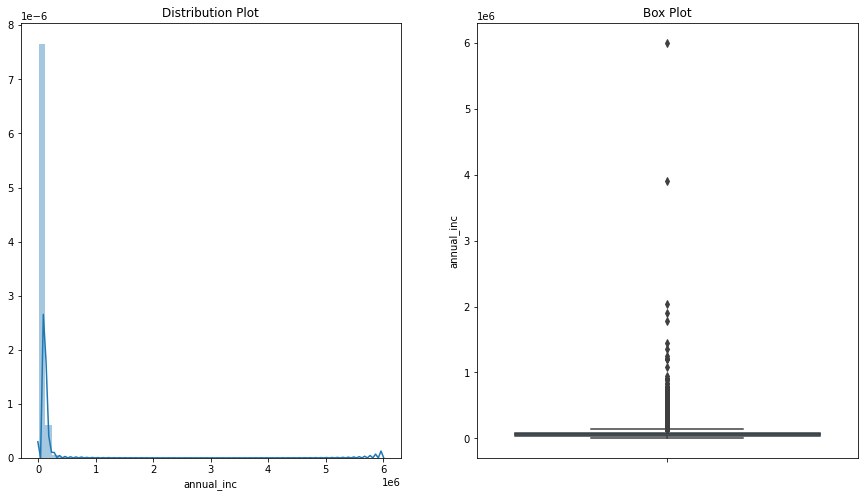

In [22]:
uni_conti(loan,'annual_inc')

#### From Above graph its clear that there are outliers in Annual Income's of applicants. 

In [23]:
loan.annual_inc.describe()

count    3.453400e+04
mean     6.978397e+04
std      6.541865e+04
min      4.080000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.350000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

##### Max Value is nearly 100 times more than the mean value, So we will remove these outliers.  
Removing Values in 99% - 100%

In [24]:
q = loan["annual_inc"].quantile(0.99)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count     34185.000000
mean      66273.550899
std       35083.137084
min        4080.000000
25%       41721.600000
50%       60000.000000
75%       82000.000000
max      234996.000000
Name: annual_inc, dtype: float64

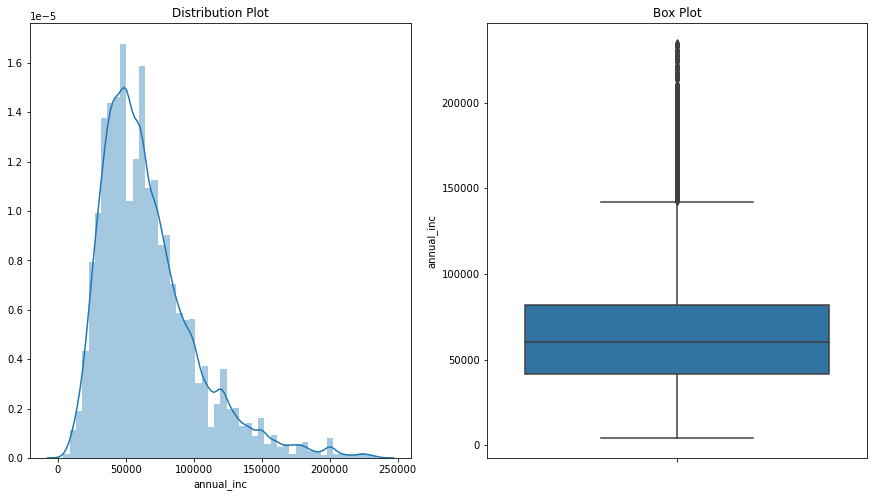

In [25]:
uni_conti(loan,'annual_inc')

##### Insight: Most applicants has annual income between 35000 to 80000.

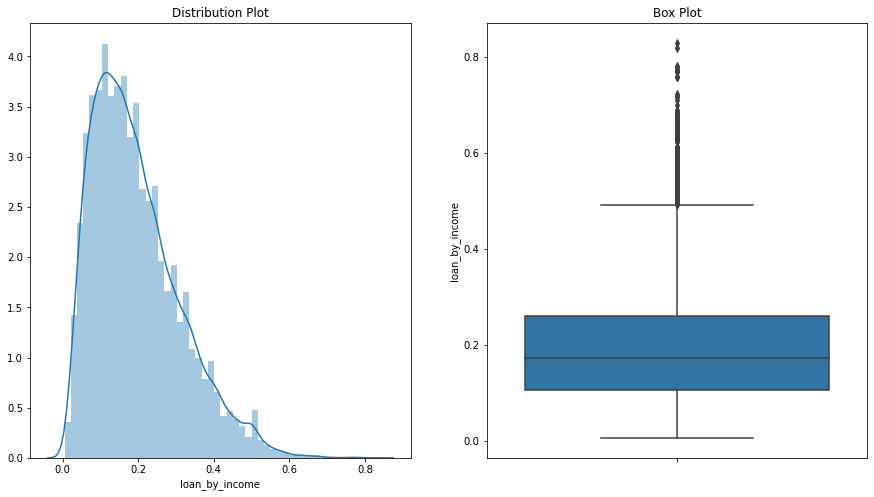

In [26]:
uni_conti(loan,'loan_by_income')

##### Insight : Applicants usually apply for loan amount of 10% - 25% of their income.

In [27]:
def uni_cate(df,col,hue=None):
    fig, axes = plt.subplots(figsize = (15,7))
    axes = sns.countplot(data = df,x=col, order= df[col].value_counts().index, hue = hue)
    plt.show()
    

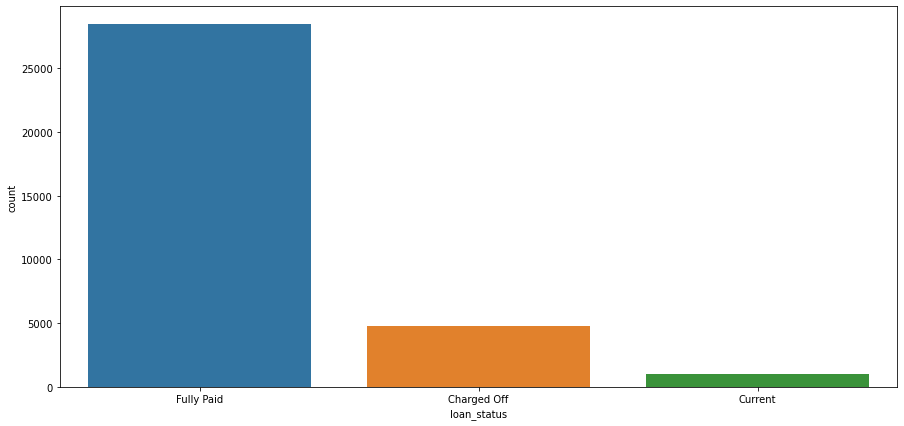

In [28]:
uni_cate(loan,'loan_status')

##### Insight: Nearly 14% applicants are charged off.

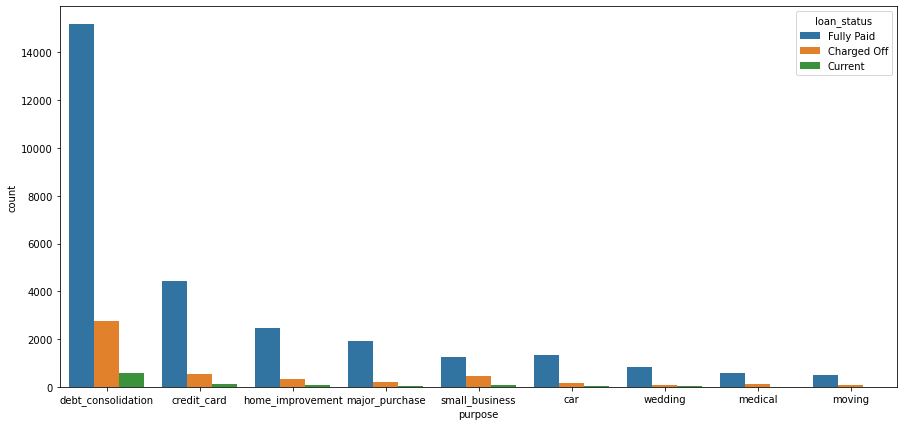

In [29]:
uni_cate(loan,'purpose','loan_status')

##### Insight: Majorly applicants apply for loan to pay off their other loans.

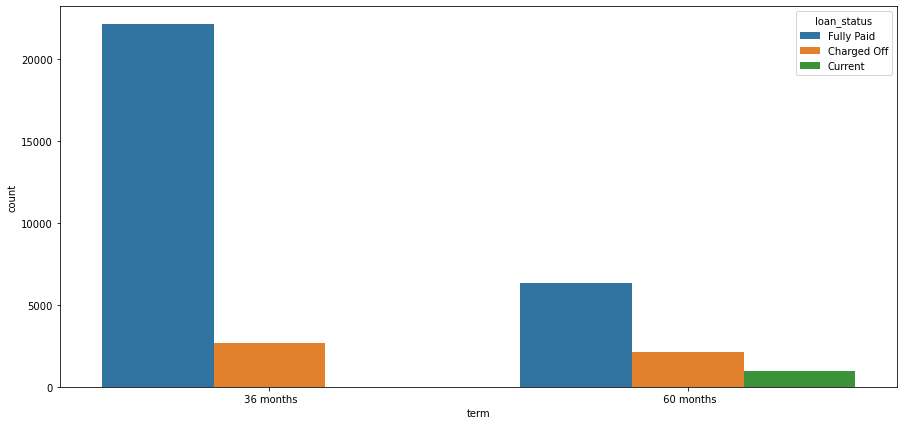

In [30]:
uni_cate(loan,'term','loan_status')

##### Insights: Loans whose term was 36 months are more ought to be fully paid than 60 months. 

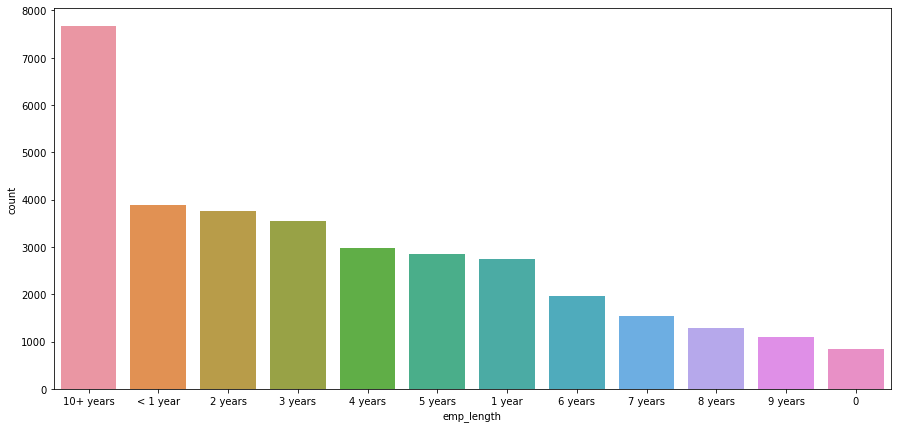

In [31]:
uni_cate(loan,'emp_length')

##### Insight: The majority of applicants belongs section of 10+ years. 

-----

### *Multivariant Analysis*

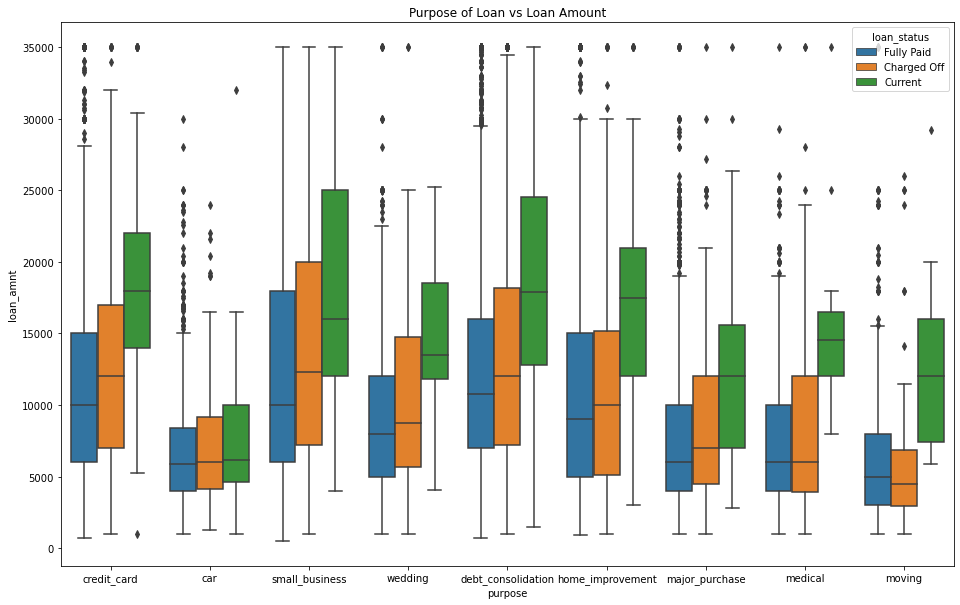

In [32]:
plt.figure(figsize=(16,10))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [33]:
loan_corr_conti_var = loan[['loan_amnt', 'funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','loan_by_income']].corr()
loan_corr_conti_var

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,loan_by_income
loan_amnt,1.000000,0.980718,0.938460,0.320563,0.925903,0.415977,0.080913,0.622116
funded_amnt,0.980718,1.000000,0.957432,0.324437,0.953161,0.410962,0.080527,0.609574
funded_amnt_inv,0.938460,0.957432,1.000000,0.316950,0.900816,0.392904,0.086657,0.580914
int_rate,0.320563,0.324437,0.316950,1.000000,0.292727,0.078009,0.117276,0.227551
installment,0.925903,0.953161,0.900816,0.292727,1.000000,0.414027,0.068005,0.556998
annual_inc,0.415977,0.410962,0.392904,0.078009,0.414027,1.000000,-0.120167,-0.320974
dti,0.080913,0.080527,0.086657,0.117276,0.068005,-0.120167,1.000000,0.158285
loan_by_income,0.622116,0.609574,0.580914,0.227551,0.556998,-0.320974,0.158285,1.000000


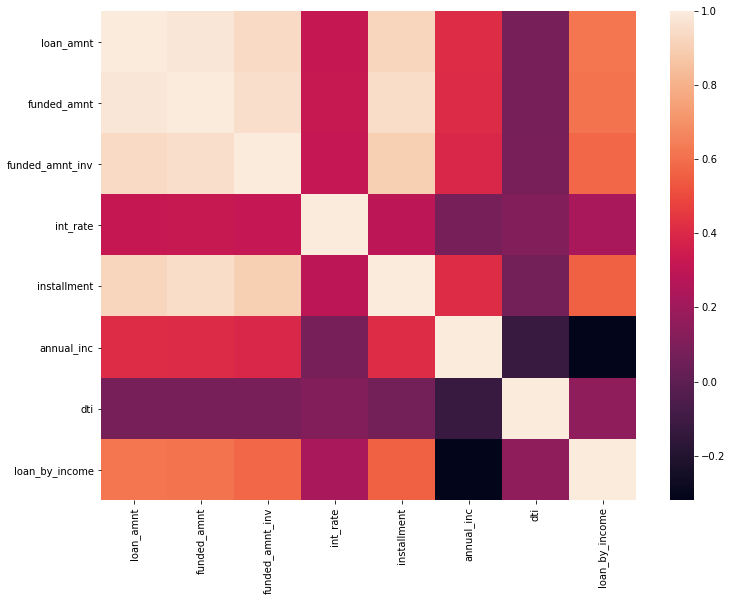

In [34]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(loan_corr_conti_var)
plt.show()

##### Insight: From heatmap it is quite clear that 'loan_amnt', 'funded_amnt', 'funded_amnt_inv' and 'installment' are highly correlated with each other.

To plot against 'emp_length' first we have to order our labels.

In [52]:
emp_len_order = ["0", "< 1 year", "1 year", "2 years","3 years","4 years","5 years","6 years","7 years","8 years","9 years","10+ years"]
loan['emp_length'] = pd.Categorical(loan['emp_length'],categories=emp_len_order, ordered=True)

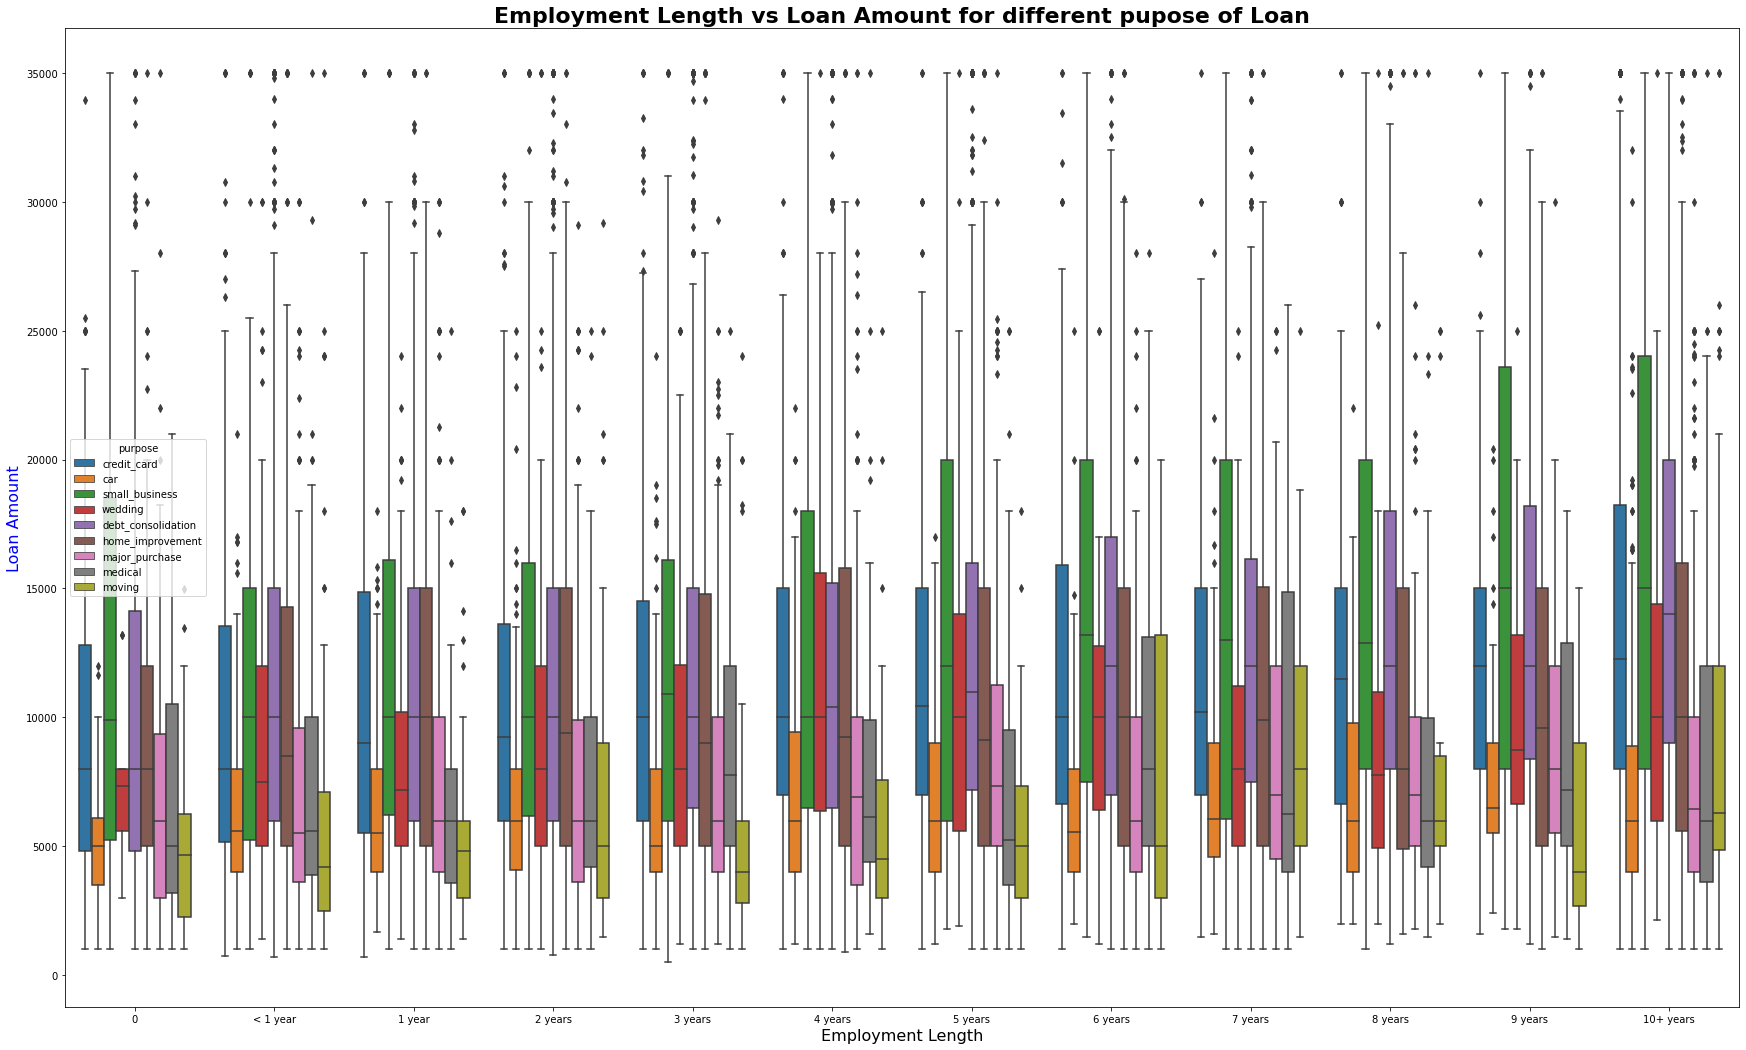

In [53]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loan)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

##### Insights: Above graph shows priority of interest of various applicants throughout their employment term. It is quite visible that as employment length increases the loan amount has also increased. Loans for small business has also increased with seniority level with exception of '0' label as it also includes self-employed.

--------

### *Probablity of Charged off*

The most important aspect of this case study is to determine which section is responsible for the company losses.

Situations with higher probablity of applicant being charged off has to be taken care of by the company, thus the further analysis is to find such weak points. 

The following formula is used to determine the probablity of charged off.
\begin{equation*} {Probability\:of\:Charged\:Off =\:}\frac{Number\:of\:Applicants\:who\:charged\:off}{Total\:No.\:of\:Applicants} \end{equation*}

We will define 2 functions for this :
1. crosstab => This function will be used to get the summarized table for each column(passed as a variable) along with probability of charge off w.r.t that column.
2. prob_plot => This function will be used to plot count of values for each column(passed as a variable) stacked across 'loan_status' along with probability of charged off as a line chart.

In [36]:
def crosstab(df,col):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    return crosstab

In [37]:
def prob_plot(df,col,stacked = True):
    plotCrosstab = crosstab(df,col)
    display(plotCrosstab)
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,160,50,1332,1542,0.104
credit_card,537,102,4450,5089,0.106
debt_consolidation,2752,580,15165,18497,0.149
home_improvement,338,97,2459,2894,0.117
major_purchase,220,37,1909,2166,0.102
medical,106,12,568,686,0.155
moving,91,7,479,577,0.158
small_business,472,74,1251,1797,0.263
wedding,94,20,823,937,0.100


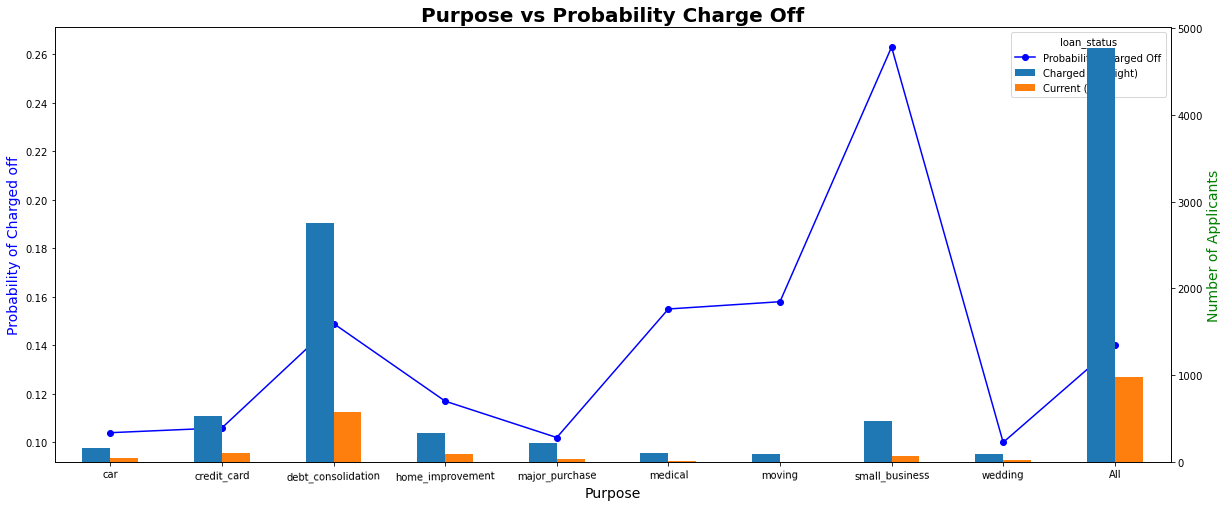

In [38]:
prob_plot(loan,'purpose',stacked = False)

##### Insight: Loan taken for small business is more riskier as it has the highest probablity of being charged off.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,492,29,8070,8591,0.057
B,1196,293,8863,10352,0.116
C,1133,235,5558,6926,0.164
D,964,190,3470,4624,0.208
E,615,159,1724,2498,0.246
F,283,60,576,919,0.308
G,87,13,175,275,0.316
All,4770,979,28436,34185,0.140


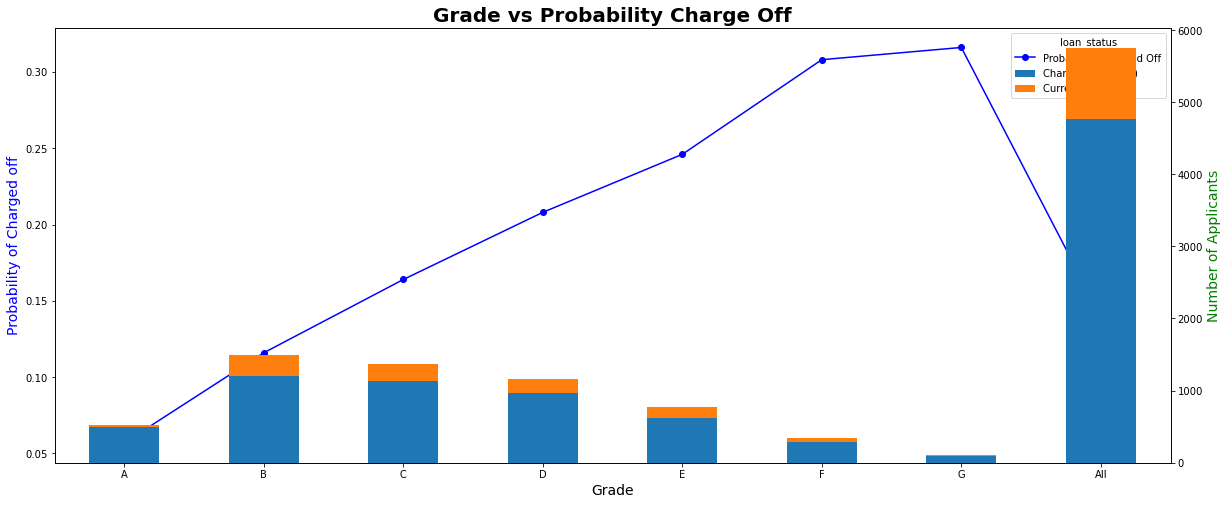

In [39]:
prob_plot(loan,'grade')

##### Insight: As Expected lower the grade more riskier is to grant the loan. The lowest grade has nearly 32% chance of being charged off.  

#### Creating Bins for analysis of continious variables 

In [40]:
# Annual Income
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

In [41]:
# Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [42]:
# Intrest Rate
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

In [43]:
# Loan By Income
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
slot = ['0-0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1']
loan['loan_by_inc_range'] = pd.cut(loan['loan_by_income'], bins, labels=slot)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,,
0-25000,366,19,1601,1986,0.184
25000-50000,1799,278,9248,11325,0.159
50000-75000,1490,319,8817,10626,0.140
75000-100000,655,196,4697,5548,0.118
100000 and above,460,167,4073,4700,0.098
All,4770,979,28436,34185,0.140


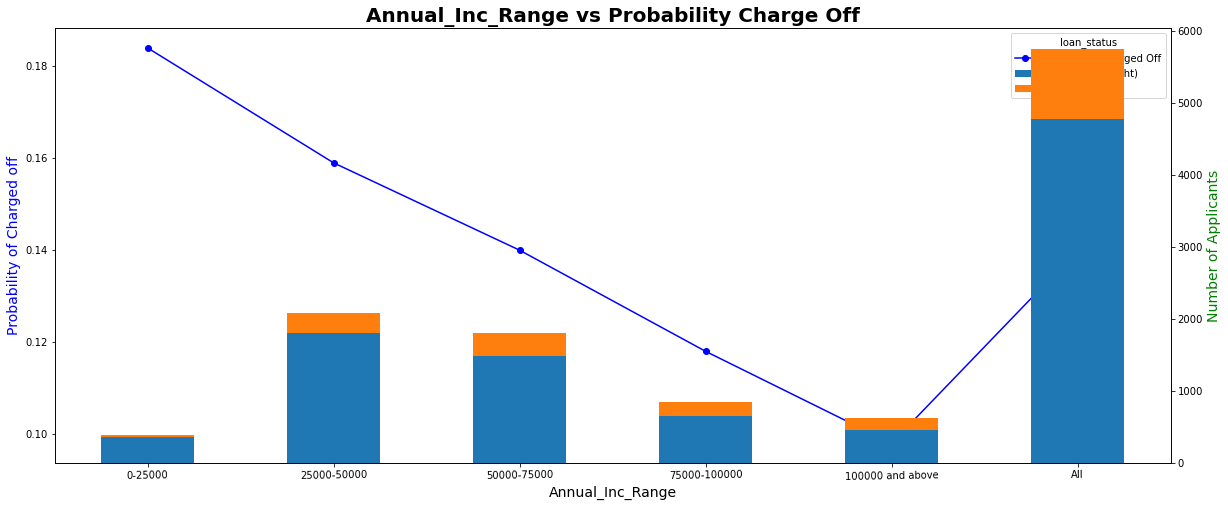

In [44]:
prob_plot(loan,'annual_inc_range')

##### Insight: Lower Income Applicants are more likely to be charged off with 18.4% probablity. 

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
loan_amnt_range,,,,,
0-5000,940,62,6257,7259,0.129
5000-10000,1394,123,9765,11282,0.124
10000-15000,964,265,6041,7270,0.133
15000-20000,690,224,3331,4245,0.163
20000-25000,490,144,2075,2709,0.181
25000 and above,292,161,967,1420,0.206
All,4770,979,28436,34185,0.140


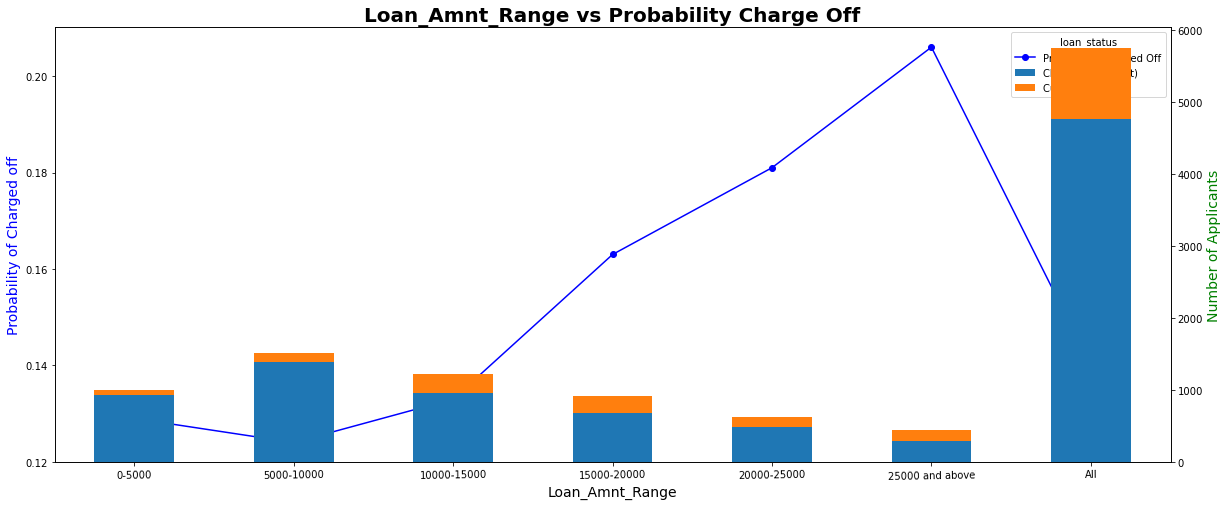

In [45]:
prob_plot(loan,'loan_amnt_range')

##### Insight: The company should be extra cautious of giving loans of 25000 or above as the probablity of it being charged off is nearly 21%.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,,
0-7.5,218,5,4430,4653,0.047
7.5-10,455,55,5440,5950,0.076
10-12.5,1049,230,7002,8281,0.127
12.5-15,1245,226,6355,7826,0.159
15 and above,1541,381,4793,6715,0.229
All,4508,897,28020,33425,0.135


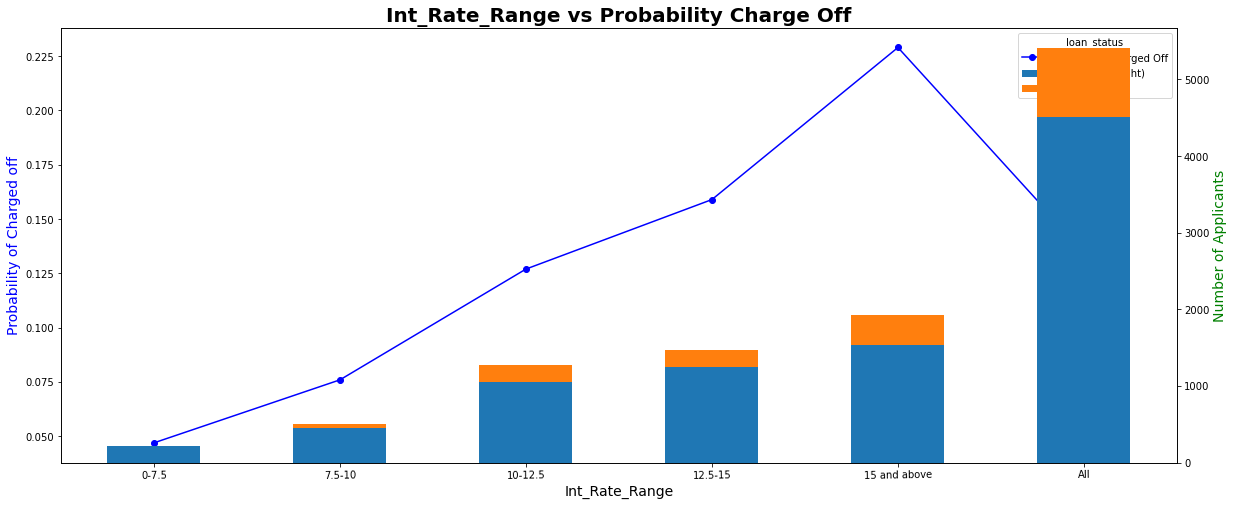

In [46]:
prob_plot(loan,'int_rate_range')

##### Insight: As the interest rate is increasing the probability that person will default is increasing with highest nearly 30% at 15% or above intrest rate.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
0,182,32,638,852,0.214
1 year,388,61,2303,2752,0.141
10+ years,1139,347,6173,7659,0.149
2 years,461,88,3209,3758,0.123
3 years,472,64,3015,3551,0.133
4 years,383,83,2508,2974,0.129
5 years,403,77,2373,2853,0.141
6 years,268,47,1656,1971,0.136
7 years,222,53,1263,1538,0.144


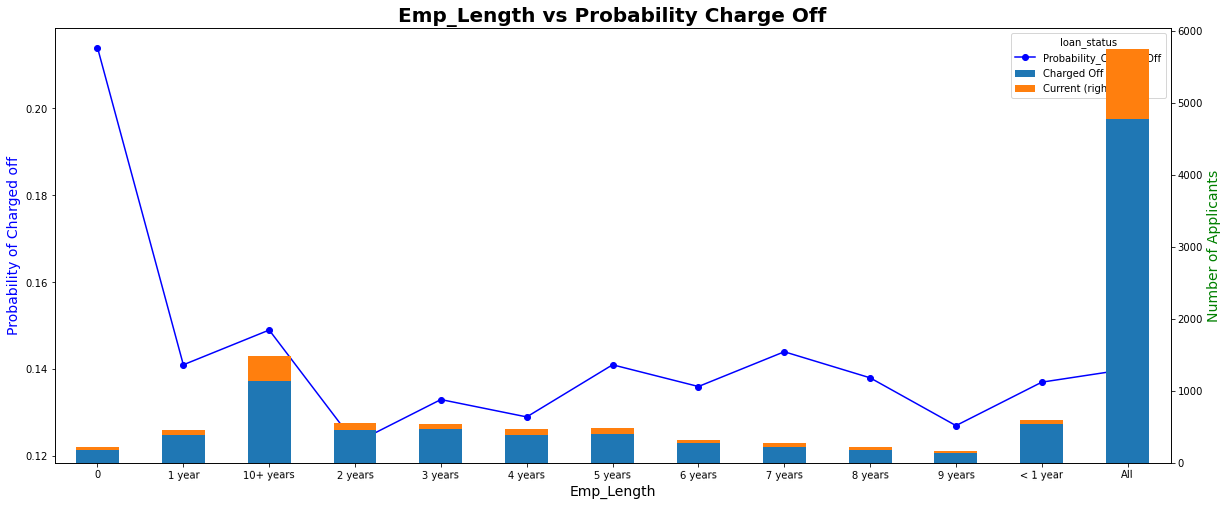

In [47]:
prob_plot(loan,'emp_length')

##### Insight: Applicants who are self-employed are more probable to be default.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
loan_by_inc_range,,,,,
0-0.1,824,83,7058,7965,0.103
0.1-0.2,1488,253,10776,12517,0.119
0.2-0.3,1182,286,6253,7721,0.153
0.3-0.4,735,199,2984,3918,0.188
0.4-0.5,394,109,1064,1567,0.251
0.5-0.6,124,43,245,412,0.301
0.6-0.7,18,5,48,71,0.254
0.7-0.8,4,1,7,12,0.333
0.8-0.9,1,0,1,2,0.500


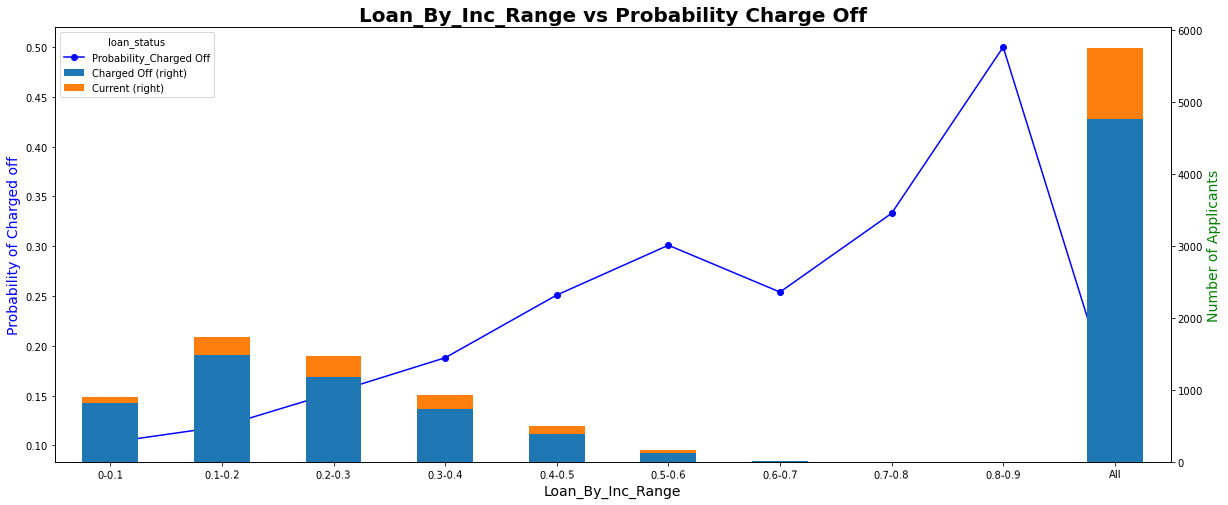

In [48]:
prob_plot(loan,'loan_by_inc_range')

##### Insight: Lower the ratio the better.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
AK,13,2,56,71,0.183
AL,48,15,337,400,0.120
AR,20,9,188,217,0.092
AZ,102,24,624,750,0.136
CA,958,131,5042,6131,0.156
CO,82,25,588,695,0.118
CT,85,21,542,648,0.131
DC,13,3,176,192,0.068
DE,8,1,88,97,0.082


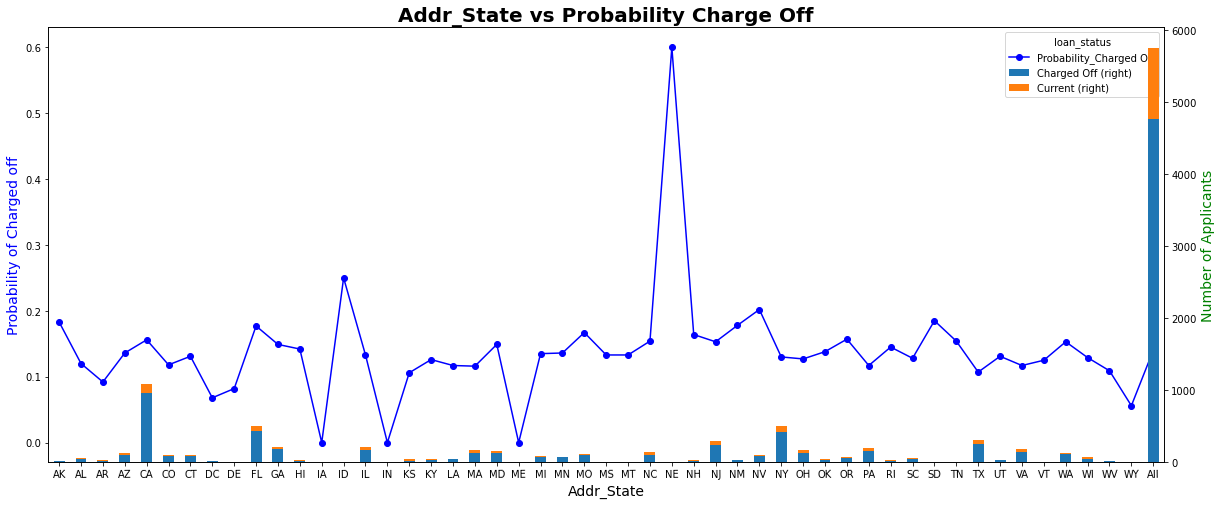

In [49]:
prob_plot(loan,'addr_state')

##### Insight: The NE province has the highest probablity of defaulters at 60%.

# ***--The End--***